<a href="https://colab.research.google.com/github/sheemambabu/CMPE-258-Deep-Learning/blob/main/Assignment%205/Assignment_5_Part_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CMPE-258 Deep Learning**

## Assignment 5 Part D

## By: Sheema Murugesh Babu (SJSU_ID: 015217176)

## Part D: Implementation using Pytorch

In [ ]:
! pip install -q kaggle

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data Imports

In [ ]:
import json
kaggle_json = {"username":"sheemamurugeshbabu","key":"e92e856b92f83bef26efee9ee6e4c25c"}

In [ ]:
import io,os
os.makedirs('/content/.kaggle/',exist_ok=True)
os.makedirs('/root/.kaggle/',exist_ok=True)

with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(kaggle_json, file)

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c new-york-city-taxi-fare-prediction

 99% 1.55G/1.56G [00:15<00:00, 96.2MB/s]
100% 1.56G/1.56G [00:15<00:00, 106MB/s] 
  0% 0.00/960k [00:00<?, ?B/s]
100% 960k/960k [00:00<00:00, 137MB/s]
  0% 0.00/486 [00:00<?, ?B/s]
100% 486/486 [00:00<00:00, 490kB/s]
  0% 0.00/335k [00:00<?, ?B/s]
100% 335k/335k [00:00<00:00, 81.9MB/s]


In [ ]:
! mkdir train
! unzip train.csv.zip -d train

Archive:  train.csv.zip
  inflating: train/train.csv         


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

plt.style.use('seaborn-whitegrid')

In [ ]:
train=pd.read_csv('/content/train/train.csv',nrows=20000)
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                20000 non-null  object 
 1   fare_amount        20000 non-null  float64
 2   pickup_datetime    20000 non-null  object 
 3   pickup_longitude   20000 non-null  float64
 4   pickup_latitude    20000 non-null  float64
 5   dropoff_longitude  20000 non-null  float64
 6   dropoff_latitude   20000 non-null  float64
 7   passenger_count    20000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,11.303321,-72.478584,39.921043,-72.497221,39.913606,1.658000
std,9.541637,10.525376,6.678592,10.460530,6.139231,1.283674
min,-3.000000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992150,40.734706,-73.991224,40.734537,1.000000
50%,8.500000,-73.981711,40.752680,-73.980217,40.753583,1.000000
75%,12.500000,-73.966802,40.767443,-73.963729,40.768135,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [ ]:
print("Old size: %d" % len(train))
train = train[train.fare_amount >=0]
print("New size: %d" % len(train))

Old size: 20000
New size: 19997


In [ ]:
# check missing data
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
print("Old size: %d" % len(train))
train = train.dropna(how='any', axis=0)
print("New size after dropping missing value: %d" % len(train))

Old size: 19997
New size after dropping missing value: 19997


Text(0, 0.5, 'Frequency')

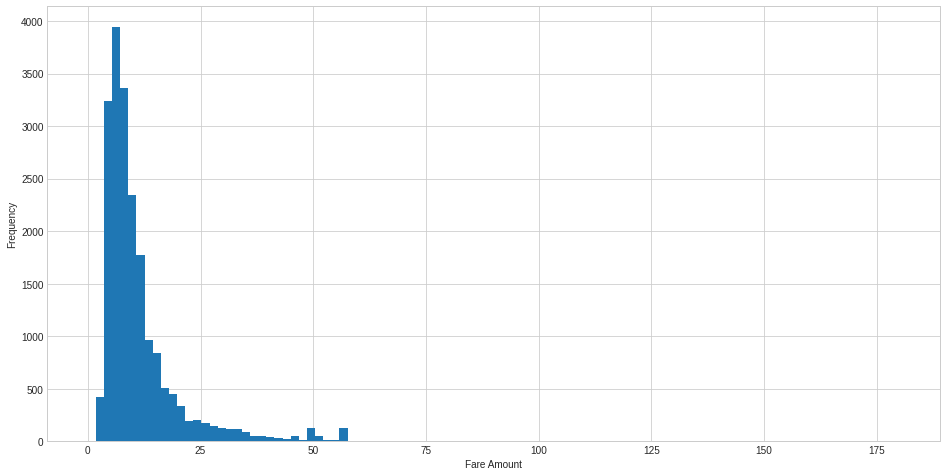

In [ ]:
# Lets see the distribution of fare amount 
train.fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

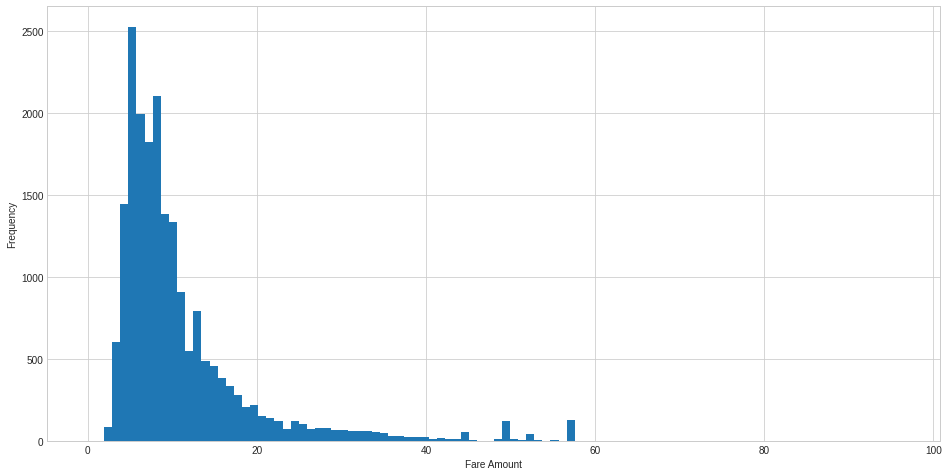

In [ ]:
# Lets see the distribution of fare amount less than 100
train[train.fare_amount <100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")


In [ ]:
train[train.fare_amount >100 ].shape

(5, 8)

In [ ]:
# checking for records where passanger count is 0
train[train.passenger_count ==0].shape

(75, 8)

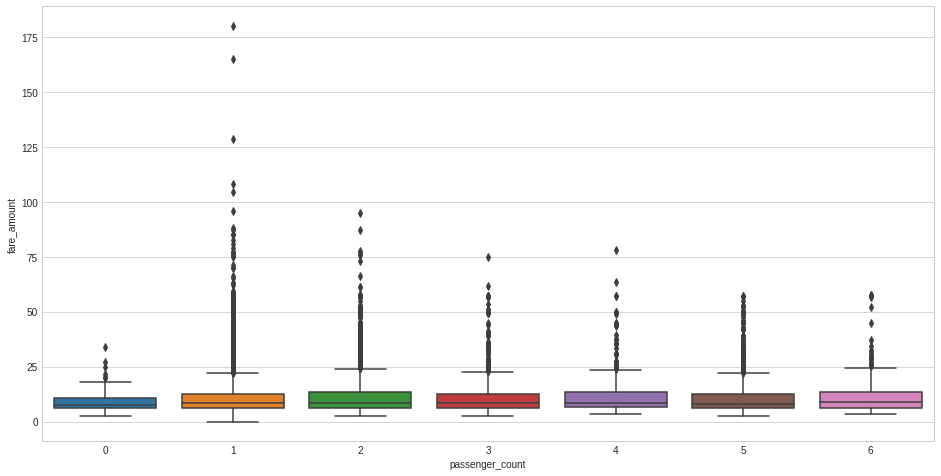

In [ ]:
plt.figure(figsize= (16,8))
sns.boxplot(x = train[train.passenger_count< 7].passenger_count, y = train.fare_amount)

In [ ]:
# this function will also be used with the test set below
def select_within_test_boundary(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [ ]:
BB = (-74.5, -72.8, 40.5, 41.8)
print('Old size: %d' % len(train))
train = train[select_within_test_boundary(train, BB)]
print('New size: %d' % len(train))

Old size: 19997
New size: 19572


In [ ]:
def prepare_time_features(df):
    df['pickup_datetime'] = df['pickup_datetime'].str.slice(0, 16)
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')
    df['hour_of_day'] = df.pickup_datetime.dt.hour
    df['month'] = df.pickup_datetime.dt.month
    df["year"] = df.pickup_datetime.dt.year
    df["weekday"] = df.pickup_datetime.dt.weekday
    return df

In [ ]:
train = prepare_time_features(train)

In [ ]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [ ]:
train['distance_miles'] = distance(train.pickup_latitude, train.pickup_longitude, \
                                      train.dropoff_latitude, train.dropoff_longitude)

In [ ]:
def transform(data):
    # Distances to nearby airports, 
    jfk = (-73.7781, 40.6413)
    ewr = (-74.1745, 40.6895)
    lgr = (-73.8740, 40.7769)

    data['pickup_distance_to_jfk'] = distance(jfk[1], jfk[0],
                                         data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_jfk'] = distance(jfk[1], jfk[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    data['pickup_distance_to_ewr'] = distance(ewr[1], ewr[0], 
                                          data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_ewr'] = distance(ewr[1], ewr[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    data['pickup_distance_to_lgr'] = distance(lgr[1], lgr[0],
                                          data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_lgr'] = distance(lgr[1], lgr[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    
    return data

train = transform(train)

In [ ]:
print("old size: %d" % len(train))
train = train.drop(index= train[(train['distance_miles']==0)&(train['fare_amount']==0)].index, axis=0)
print("New size: %d" % len(train))

old size: 19572
New size: 19572


In [ ]:
print("old size: %d" % len(train))
train = train.drop(index= train[train['fare_amount']==0].index, axis=0)
print("New size: %d" % len(train))

old size: 19572
New size: 19571


In [ ]:
print("old size: %d" % len(train))
train = train.drop(index= train[train['fare_amount'] < 2.5].index, axis=0)
print("New size: %d" % len(train))

old size: 19571
New size: 19570


In [ ]:
print("old size: %d" % len(train))
train = train.drop(index= train[train.passenger_count >= 7].index, axis=0)
print("New size: %d" % len(train))

old size: 19570
New size: 19570


In [ ]:
# create copy of the data set
df_train = train.drop(columns= ['key','pickup_datetime'], axis= 1).copy()
print(df_train.shape)


(19570, 17)


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('fare_amount', axis=1),
                                                    df_train['fare_amount'], test_size=0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15656, 16)
(3914, 16)
(15656,)
(3914,)


In [ ]:
import xgboost as xgb

In [ ]:
params = {
   
    'max_depth': 7,
    'gamma' :0,
    'eta':.03, 
    'subsample': 1,
    'colsample_bytree': 0.9, 
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 0
}

In [ ]:
def XGBmodel(X_train,X_test,y_train,y_test,params):
    matrix_train = xgb.DMatrix(X_train,label=y_train)
    matrix_test = xgb.DMatrix(X_test,label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train,num_boost_round=5000, 
                    early_stopping_rounds=10,evals=[(matrix_test,'test')])
    return model

model = XGBmodel(X_train,X_test,y_train,y_test,params)

[01:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-rmse:14.0227
Will train until test-rmse hasn't improved in 10 rounds.
[1]	test-rmse:13.6469
[2]	test-rmse:13.3014
[3]	test-rmse:12.948
[4]	test-rmse:12.607
[5]	test-rmse:12.2774
[6]	test-rmse:11.9579
[7]	test-rmse:11.649
[8]	test-rmse:11.3471
[9]	test-rmse:11.0587
[10]	test-rmse:10.7921
[11]	test-rmse:10.5208
[12]	test-rmse:10.2578
[13]	test-rmse:10.003
[14]	test-rmse:9.75695
[15]	test-rmse:9.51677
[16]	test-rmse:9.28942
[17]	test-rmse:9.06845
[18]	test-rmse:8.85512
[19]	test-rmse:8.64909
[20]	test-rmse:8.44952
[21]	test-rmse:8.25781
[22]	test-rmse:8.08628
[23]	test-rmse:7.91122
[24]	test-rmse:7.74129
[25]	test-rmse:7.57872
[26]	test-rmse:7.41894
[27]	test-rmse:7.26642
[28]	test-rmse:7.11756
[29]	test-rmse:6.97602
[30]	test-rmse:6.83867
[31]	test-rmse:6.70873
[32]	test-rmse:6.58341
[33]	test-rmse:6.46209
[34]	test-rmse:6.3491
[35]	test-rmse:6.23876
[36

# References 

1) https://www.kaggle.com/sandeepkumar121995/eda-data-cleaning-xg-boost